# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
# Save api_key information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
print(query_url) 


http://api.openweathermap.org/data/2.5/weather?appid=16511068a487c94d8da78707ea12cd98&units=imperial


In [65]:
#Create lists for dataframe and API Calls 
city_name = []
country = []
clouds = []
lat = []
lngs = []
temp = []
max_temp = []
min_temp = []
humidity = []
wind = []

#Keep count
city_record = 1

#Statement of API log 
print("Data Retreieved:")
print("---------------------")

#Loop through cities in lists:
for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        clouds.append(response['clouds']['all'])
        lat.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        min_temp.append(response["main"]["temp_min"])
        humidity.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])

        print(f"Displaying Record #{city_record} for {city}")

        #Increase counter
        city_record += 1

    #If no city found, handle for exception:
    except Exception:
        print("City not found, next city...")
        pass

Data Retreieved:
---------------------
Displaying Record #1 for bluff
Displaying Record #2 for ushuaia
Displaying Record #3 for bredasdorp
Displaying Record #4 for torbay
Displaying Record #5 for tuktoyaktuk
Displaying Record #6 for jamestown
Displaying Record #7 for trinidad
Displaying Record #8 for dalvik
Displaying Record #9 for surt
Displaying Record #10 for atuona
Displaying Record #11 for rikitea
Displaying Record #12 for new norfolk
Displaying Record #13 for kodiak
Displaying Record #14 for kruisfontein
Displaying Record #15 for thompson
Displaying Record #16 for hermanus
Displaying Record #17 for bambous virieux
City not found, next city...
Displaying Record #18 for santa rosa
Displaying Record #19 for tuatapere
Displaying Record #20 for hobyo
Displaying Record #21 for hun
City not found, next city...
Displaying Record #22 for bontoc
Displaying Record #23 for kabo
Displaying Record #24 for georgetown
Displaying Record #25 for albany
Displaying Record #26 for busselton
Displayin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
#Convert data to DataFrame:
weather_data = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lngs,
    "Cloudiness": clouds,
    "Temperature": temp,
    "Max_Temp": max_temp,
    "Min_Temp": min_temp,
    "Humidity": humidity,
    "Wind Speed": wind
}

city_weather_df = pd.DataFrame(weather_data)
city_weather_df.head()



,City,Country,Latitude,Longitude,Cloudiness,Temperature,Max_Temp,Min_Temp,Humidity,Wind Speed
0,Bluff,NZ,-46.6000,168.3333,100,52.81,52.81,52.81,58,2.35
1,Ushuaia,AR,-54.8000,-68.3000,20,42.46,42.46,42.46,49,17.27
2,Bredasdorp,ZA,-34.5322,20.0403,12,57.02,57.02,57.02,67,18.19
3,Torbay,CA,47.6666,-52.7314,75,67.19,68.58,65.16,92,23.02
4,Tuktoyaktuk,CA,69.4541,-133.0374,100,55.40,55.40,55.40,94,5.75


In [125]:
#Export Dataframe to CSV
city_weather_df.to_csv("../WeatherPy/Data Sets/weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [92]:
#Check if Humidity values over 100
city_weather_df["Humidity"].describe()


count    585.000000
mean      71.215385
std       20.330104
min        1.000000
25%       61.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [104]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = city_weather_df[(city_weather_df["Humidity"] >= 100)].index
humidity_over


Int64Index([32, 39, 204, 293, 353, 476, 506], dtype='int64')

In [142]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_weather_df.drop(humidity_over, inplace=False)
clean_city_data

,City,Country,Latitude,Longitude,Cloudiness,Temperature,Max_Temp,Min_Temp,Humidity,Wind Speed
0,Bluff,NZ,-46.6000,168.3333,100,52.81,52.81,52.81,58,2.35
1,Ushuaia,AR,-54.8000,-68.3000,20,42.46,42.46,42.46,49,17.27
2,Bredasdorp,ZA,-34.5322,20.0403,12,57.02,57.02,57.02,67,18.19
3,Torbay,CA,47.6666,-52.7314,75,67.19,68.58,65.16,92,23.02
4,Tuktoyaktuk,CA,69.4541,-133.0374,100,55.40,55.40,55.40,94,5.75
...,...,...,...,...,...,...,...,...,...,...
580,Sabzawār,IR,36.2126,57.6819,0,58.28,58.28,58.28,25,9.22
581,Acarí,PE,-15.4311,-74.6158,45,63.27,63.27,63.27,70,1.95
582,Tarauacá,BR,-8.1614,-70.7656,2,71.71,71.71,71.71,57,0.74
583,Illela,NG,13.7292,5.2975,100,78.04,78.04,78.04,78,6.20


In [126]:
#Export clean data to csv
clean_city_data.to_csv("../WeatherPy/Data Sets/clean_city_data.csv", index=False, header=True)

In [103]:
clean_city_data["Humidity"].describe()

count    578.000000
mean      70.866782
std       20.202817
min        1.000000
25%       61.000000
50%       75.000000
75%       86.000000
max       99.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

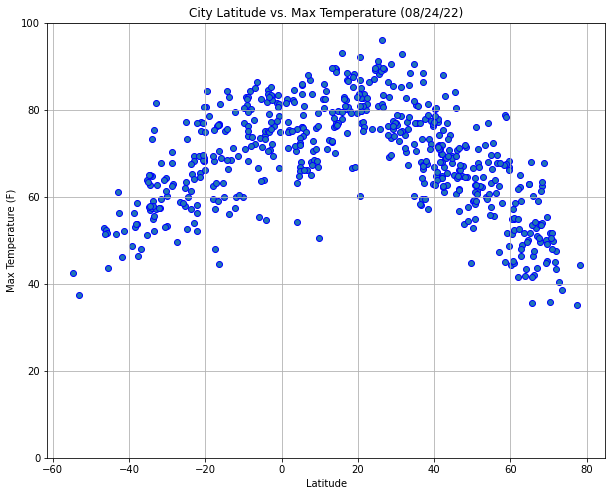

In [173]:
#Creating a scatterplot from the data
x_value = clean_city_data["Latitude"]
y_value = clean_city_data["Temperature"]

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_value,y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Max Temperature (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,100)
plt.grid()

#Save figure as png
plt.savefig("../WeatherPy/Images/figure1.png")
plt.show()


## Latitude vs. Humidity Plot

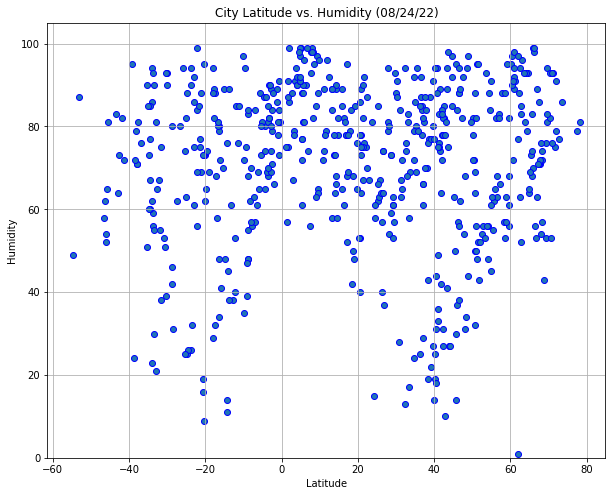

In [174]:
#Creating a scatterplot from the data
x_value = clean_city_data["Latitude"]
y_value = clean_city_data["Humidity"]

fig2, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_value,y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Humidity (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(0,105)
plt.grid()

#Save figure as png
plt.savefig("../WeatherPy/Images/figure2.png")
plt.show()

## Latitude vs. Cloudiness Plot

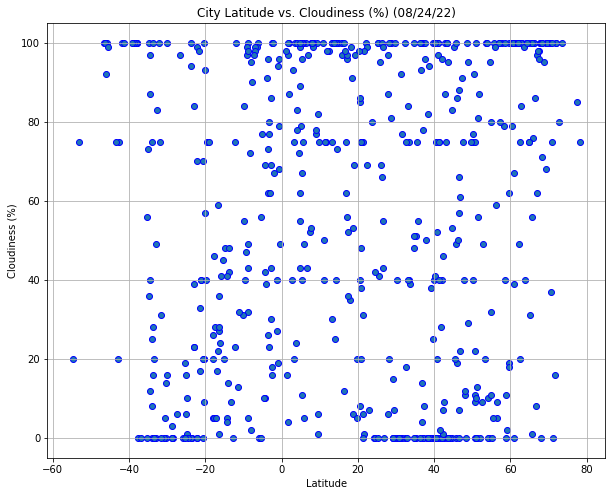

In [175]:
#Creating a scatterplot from the data
x_value = clean_city_data["Latitude"]
y_value = clean_city_data["Cloudiness"]

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_value,y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Cloudiness (%) (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid()

#Save figure as png
plt.savefig("../WeatherPy/Images/figure3.png")
plt.show()

## Latitude vs. Wind Speed Plot

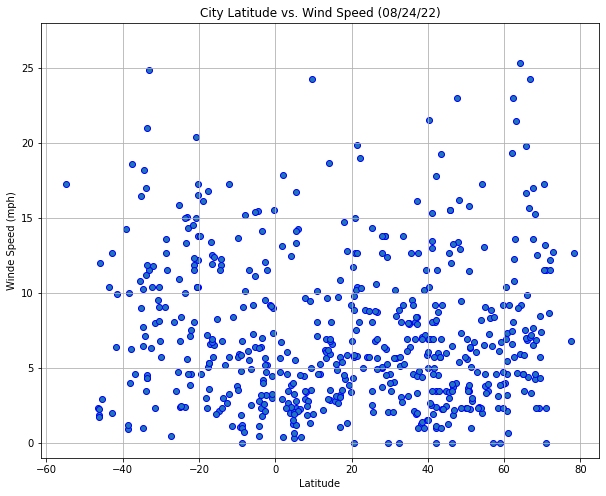

In [176]:
#Creating a scatterplot from the data
x_value = clean_city_data["Latitude"]
y_value = clean_city_data["Wind Speed"]

fig4, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_value,y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Wind Speed (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Winde Speed (mph)")
plt.ylim(-1,28)
plt.grid()

#Save figure as png
plt.savefig("../WeatherPy/Images/figure4.png")
plt.show()

## Linear Regression

In [168]:
#Creating dataframe for north/south hemisphere 
northern_hemisphere_df= clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_hemisphere_df= clean_city_data.loc[clean_city_data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47603461326650187
The correlation between both factors is -0.69


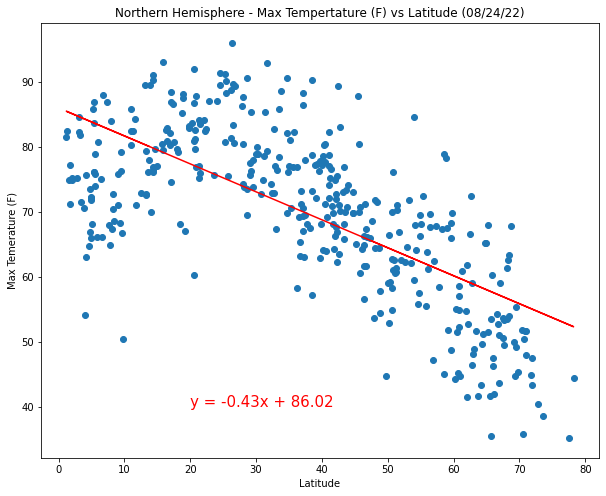

In [188]:
# Calculate the correlation coefficient and linear regression model 
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Max_Temp"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Tempertature (F) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/north_temp_lat_png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4963766254230364
The correlation between both factors is 0.7


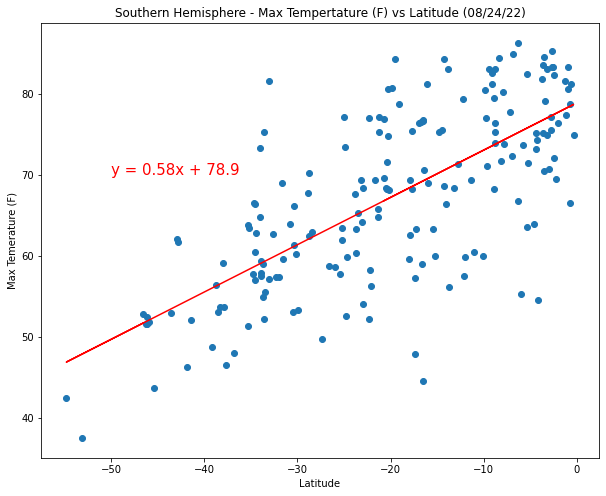

In [190]:
# Calculate the correlation coefficient and linear regression model 
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Max_Temp"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig2, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Tempertature (F) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/south_temp_lat_png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013564195965782748
The correlation between both factors is -0.12


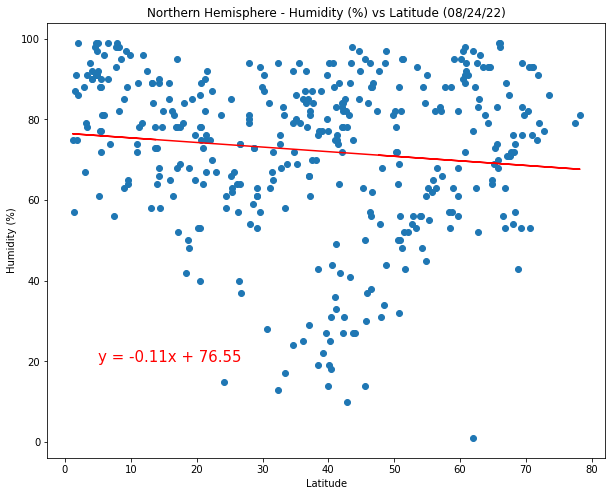

In [191]:
# Calculate the correlation coefficient and linear regression model 
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Humidity"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/north_humid_lat_png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01637856159718868
The correlation between both factors is 0.13


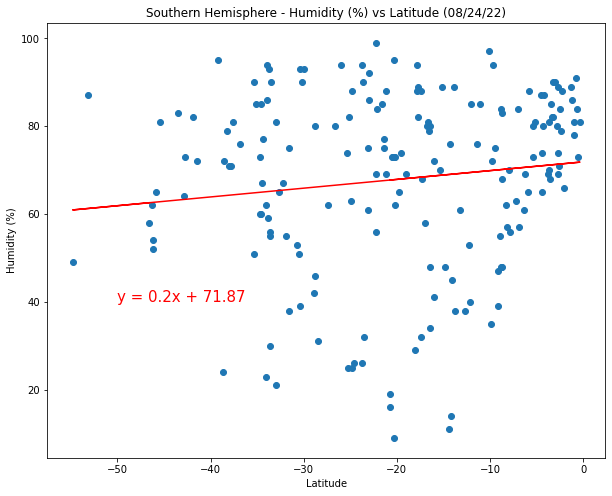

In [192]:
# Calculate the correlation coefficient and linear regression model 
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Humidity"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/south_humid_lat_png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002559051745569376
The correlation between both factors is -0.02


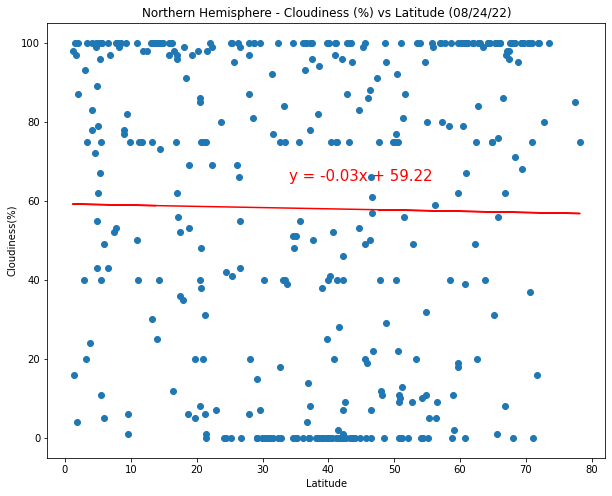

In [196]:
# Calculate the correlation coefficient and linear regression model 
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Cloudiness"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(34,65),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/north_cloud_lat_png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00019981190311687785
The correlation between both factors is -0.01


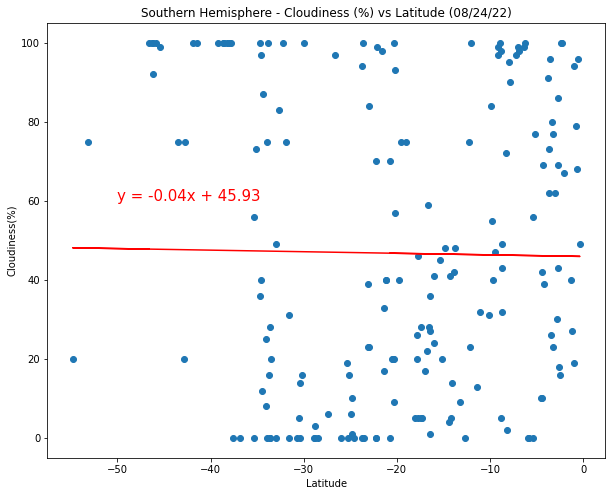

In [199]:
# Calculate the correlation coefficient and linear regression model 
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Cloudiness"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/south_cloud_lat_png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023777486924231865
The correlation between both factors is 0.15


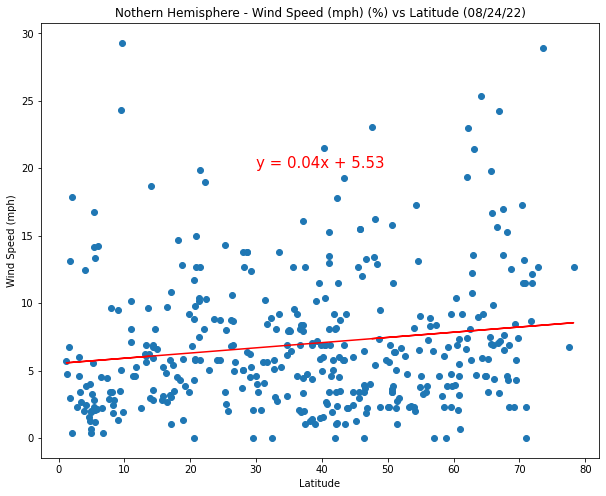

In [201]:
# Calculate the correlation coefficient and linear regression model 
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Wind Speed"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Wind Speed (mph) (%) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/north_wind_lat_png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06203760649059877
The correlation between both factors is -0.25


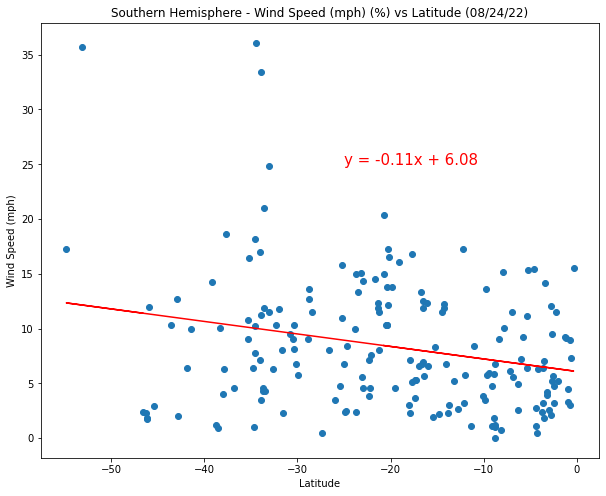

In [204]:
# Calculate the correlation coefficient and linear regression model 
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Wind Speed"]

#correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig3, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) (%) vs Latitude (08/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.savefig("../WeatherPy/Images/south_wind_lat_png")
plt.show()